#### Dataset 

In [1]:
# Dataset: bbc-news-data.txt
# Location: https://mitu.co.in/dataset

#### Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read dataset

In [7]:
file = open('/home/mitu/bbc-text-data.csv')

In [8]:
data = file.readlines()

In [10]:
len(data)

2225

#### Feature Extraction

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf = TfidfVectorizer(stop_words='english')

In [14]:
x_vect = tfidf.fit_transform(data)

In [15]:
x_vect.shape

(2225, 29126)

#### Elbow method

In [17]:
from sklearn.cluster import KMeans

In [21]:
sse = []
for k in range(1,40):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit_predict(x_vect)
    sse.append(km.inertia_)

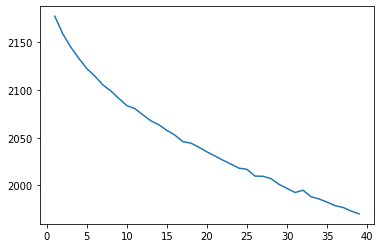

In [22]:
plt.plot(range(1,40), sse)

In [23]:
from kneed import KneeLocator

In [25]:
kl = KneeLocator(range(1, 40), sse, curve="convex", 
                 direction="decreasing")

In [26]:
kl.elbow

17

#### Build the model

In [31]:
km = KMeans(n_clusters=5, random_state=0)

In [32]:
labels = km.fit_predict(x_vect)

In [33]:
labels

array([0, 1, 2, ..., 4, 1, 2], dtype=int32)

In [34]:
km.labels_

array([0, 1, 2, ..., 4, 1, 2], dtype=int32)

In [35]:
len(labels)

2225

In [44]:
df = pd.DataFrame(data, columns=['text'])

2225

In [48]:
print('0:', len(df[labels == 0]))
print('1:', len(df[labels == 1]))
print('2:', len(df[labels == 2]))
print('3:', len(df[labels == 3]))
print('4:', len(df[labels == 4]))

0: 372
1: 715
2: 536
3: 263
4: 339


In [68]:
from nltk import FreqDist
from nltk.corpus import stopwords

In [75]:
two = df[labels == 2]['text']
two_data = list(two.values)
words = []
for sent in two_data:
    words.extend(sent.split())

words = [word for word in words 
         if word not in stopwords.words('english')
        and word.isalpha()]

freq = FreqDist(words)
freq.most_common(10)

[('said', 572),
 ('game', 465),
 ('first', 448),
 ('england', 442),
 ('would', 420),
 ('last', 404),
 ('world', 385),
 ('two', 371),
 ('win', 368),
 ('one', 360)]

In [76]:
two = df[labels == 0]['text']
two_data = list(two.values)
words = []
for sent in two_data:
    words.extend(sent.split())

words = [word for word in words 
         if word not in stopwords.words('english')
        and word.isalpha()]

freq = FreqDist(words)
freq.most_common(10)

[('said', 1158),
 ('people', 898),
 ('also', 500),
 ('mr', 491),
 ('new', 478),
 ('mobile', 458),
 ('would', 449),
 ('one', 448),
 ('could', 444),
 ('technology', 435)]

In [77]:
two = df[labels == 1]['text']
two_data = list(two.values)
words = []
for sent in two_data:
    words.extend(sent.split())

words = [word for word in words 
         if word not in stopwords.words('english')
        and word.isalpha()]

freq = FreqDist(words)
freq.most_common(10)

[('said', 1936),
 ('us', 904),
 ('mr', 834),
 ('would', 780),
 ('also', 637),
 ('new', 589),
 ('year', 584),
 ('government', 570),
 ('could', 469),
 ('last', 459)]

In [78]:
two = df[labels == 3]['text']
two_data = list(two.values)
words = []
for sent in two_data:
    words.extend(sent.split())

words = [word for word in words 
         if word not in stopwords.words('english')
        and word.isalpha()]

freq = FreqDist(words)
freq.most_common(10)

[('mr', 1442),
 ('said', 996),
 ('would', 759),
 ('labour', 703),
 ('blair', 502),
 ('party', 492),
 ('election', 439),
 ('government', 438),
 ('people', 387),
 ('brown', 345)]

In [79]:
two = df[labels == 4]['text']
two_data = list(two.values)
words = []
for sent in two_data:
    words.extend(sent.split())

words = [word for word in words 
         if word not in stopwords.words('english')
        and word.isalpha()]

freq = FreqDist(words)
freq.most_common(10)

[('film', 707),
 ('best', 614),
 ('said', 410),
 ('also', 359),
 ('music', 330),
 ('one', 307),
 ('new', 295),
 ('year', 287),
 ('us', 286),
 ('awards', 248)]